In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
from sklearn import svm

In [2]:
data = np.genfromtxt('ex6data1.txt')
X = data[:, :2]
y = data[:, 2]

In [3]:
def plotData(X, y, title = None, width = None, height = None):
    if width == None and height == None:
        fig, ax = plt.subplots(figsize = (8,6))
    else:
        fig, ax = plt.subplots(figsize = (width, height))
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    ax.scatter(X[pos, 0], X[pos, 1], marker = '+', s = 60)
    ax.scatter(X[neg, 0], X[neg, 1], s = 55)
    ax.set_title(title)
    return fig, ax

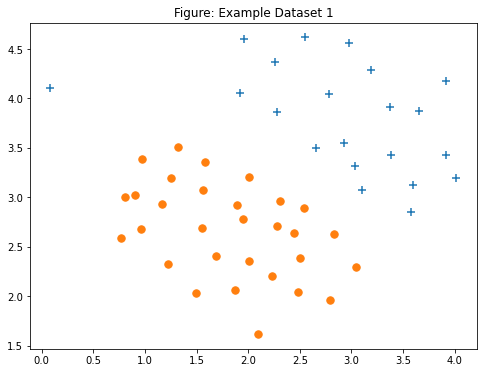

In [4]:
fig, ax = plotData(X, y, 'Figure: Example Dataset 1')

In [5]:
def visualizeBoundaryLinear(X, model, fig, ax):
    
    theta = model.coef_[0]
    b     = model.intercept_[0]
    xp    = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    yp    = (- b - theta[0] * xp) / theta[1]
    ax.plot(xp, yp, color = 'black')
    
    return fig, ax

Training accuracy: 98.0392156862745 %
--------------------------------------


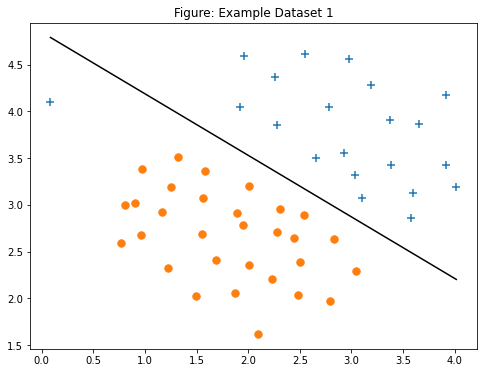

In [6]:
model = svm.SVC(kernel = 'linear', C = 1)
model.fit(X, y)
pred = model.predict(X)
print('Training accuracy: %s' % (np.mean(pred == y) * 100 ), '%' )
print('--------------------------------------')
fig, ax = visualizeBoundaryLinear(X, model, fig, ax)
fig

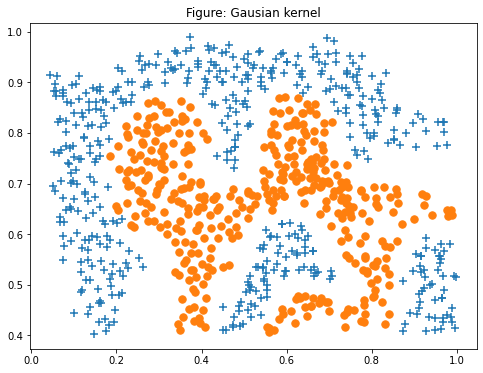

In [7]:
del fig, ax
data = np.genfromtxt('ex6data2.txt')
X = data[:, :2]
y = data[:, 2]
fig, ax = plotData(X, y, 'Figure: Gausian kernel')

In [8]:
def GaussianSvmBoundary(X, y, model, width, height):
    fig, ax = plotData(X, y, width = width, height = height)
    x1plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100).T
    x2plot = np.linspace(X[:, 1].min(), X[:, 1].max(), 100).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        this_X = np.concatenate((X1[:, i].reshape((-1, 1)), X2[:, i].reshape((-1, 1))), axis = 1)
        vals[:, i] = model.predict(this_X)
    ax.contour(X1, X2, vals)
    return fig, ax

Training accuracy: 98.72537659327925 %
--------------------------------------


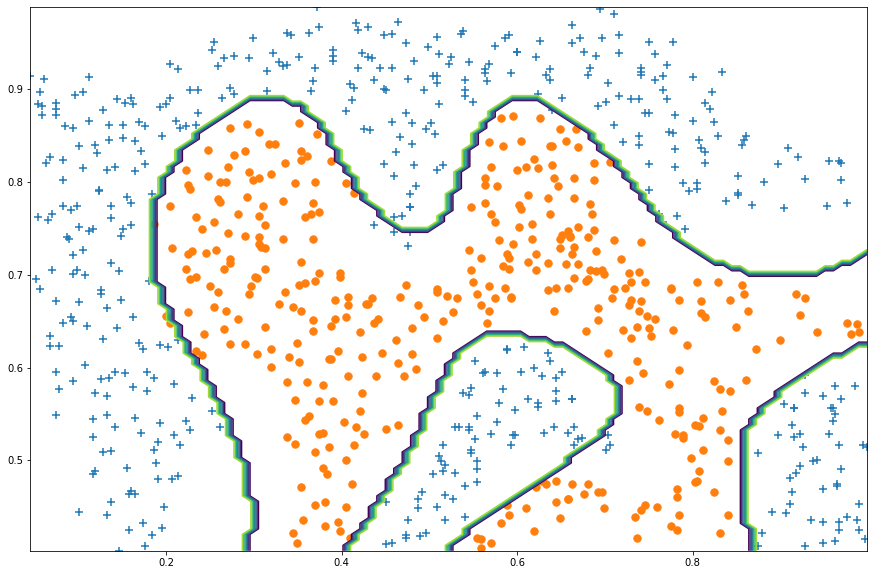

In [9]:
del fig, ax
model = svm.SVC(kernel = 'rbf', C = 1000)
model.fit(X, y)
pred = model.predict(X)
print('Training accuracy: %s' % (np.mean(pred == y) * 100 ), '%' )
print('--------------------------------------')
fig, ax = GaussianSvmBoundary(X, y, model, 15, 10)
plt.show()

In [10]:
data = np.genfromtxt('ex6data3_train.txt')
X = data[:, :2]
y = data[:, 2]

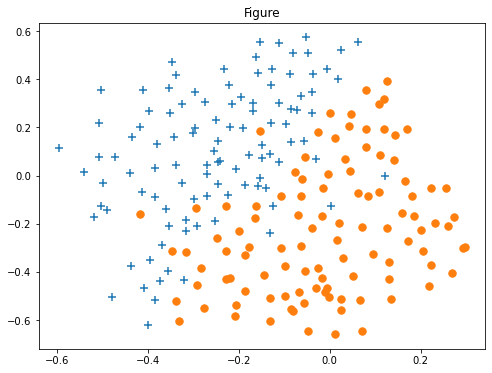

In [11]:
fig, ax = plotData(X, y, 'Figure')

Training accuracy: 93.8388625592417 %
--------------------------------------


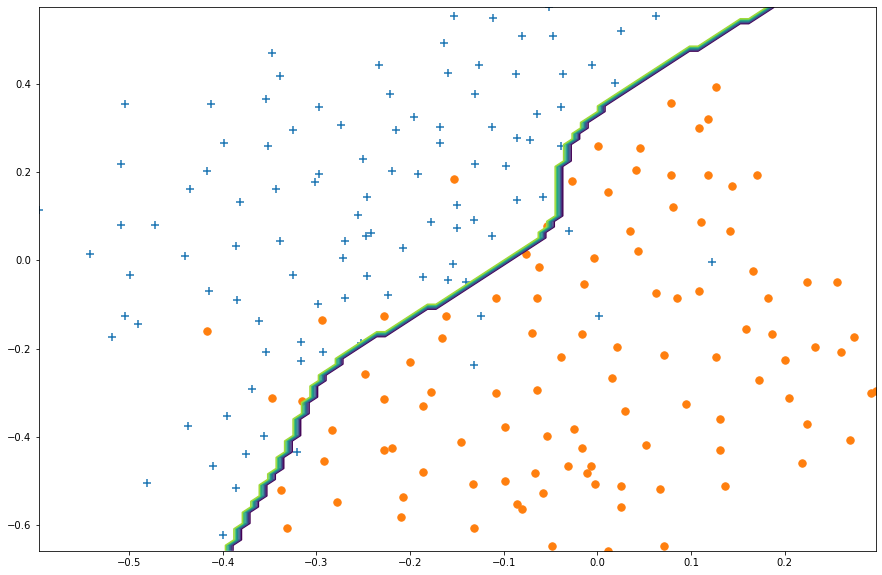

In [12]:
del fig, ax
model = svm.SVC(kernel = 'rbf', C = 1000)
model.fit(X, y)
pred = model.predict(X)
print('Training accuracy: %s' % (np.mean(pred == y) * 100 ), '%' )
print('--------------------------------------')
fig, ax = GaussianSvmBoundary(X, y, model, 15, 10)
plt.show()